In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind, chi2_contingency


import matplotlib.patches as mpatches

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
# Load Breast Cancer dataset from sklearn
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 = malignant, 1 = benign
print(f"Data shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts(normalize=True)}")

Data shape: (569, 30)
Target distribution:
1    0.627417
0    0.372583
Name: proportion, dtype: float64


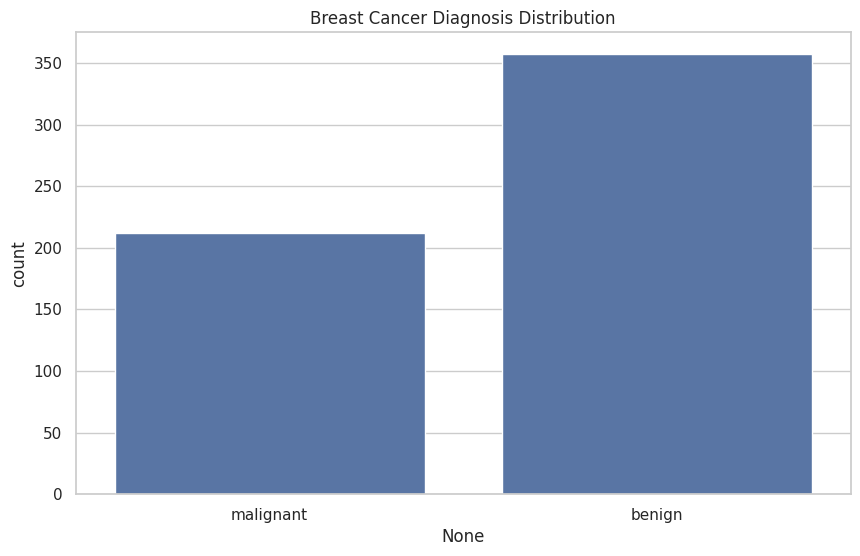

In [ ]:
# Convert target to categorical labels 
y_labels = y.map({0: 'malignant', 1: 'benign'})

# Target distribution plot
plt.figure()
sns.countplot(x=y_labels)
plt.title('Breast Cancer Diagnosis Distribution')
plt.show()

In [ ]:

# Summary statistics 
summary = X.copy()
summary['diagnosis'] = y_labels
print(summary.groupby('diagnosis').mean().T)


diagnosis                    benign    malignant
mean radius               12.146524    17.462830
mean texture              17.914762    21.604906
mean perimeter            78.075406   115.365377
mean area                462.790196   978.376415
mean smoothness            0.092478     0.102898
mean compactness           0.080085     0.145188
mean concavity             0.046058     0.160775
mean concave points        0.025717     0.087990
mean symmetry              0.174186     0.192909
mean fractal dimension     0.062867     0.062680
radius error               0.284082     0.609083
texture error              1.220380     1.210915
perimeter error            2.000321     4.323929
area error                21.135148    72.672406
smoothness error           0.007196     0.006780
compactness error          0.021438     0.032281
concavity error            0.025997     0.041824
concave points error       0.009858     0.015060
symmetry error             0.020584     0.020472
fractal dimension er

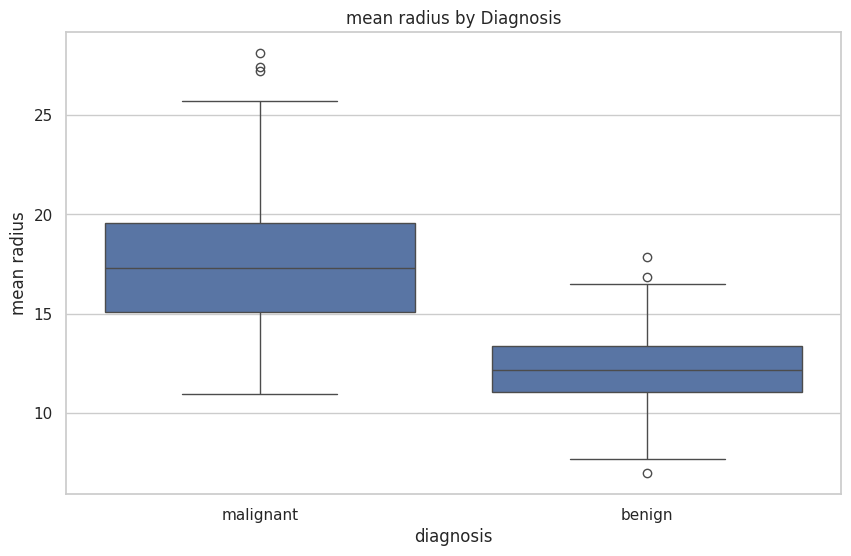

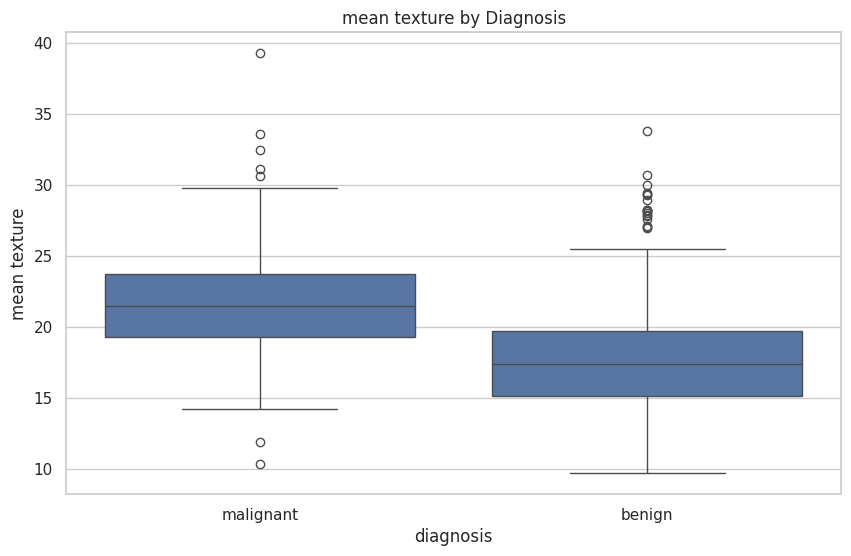

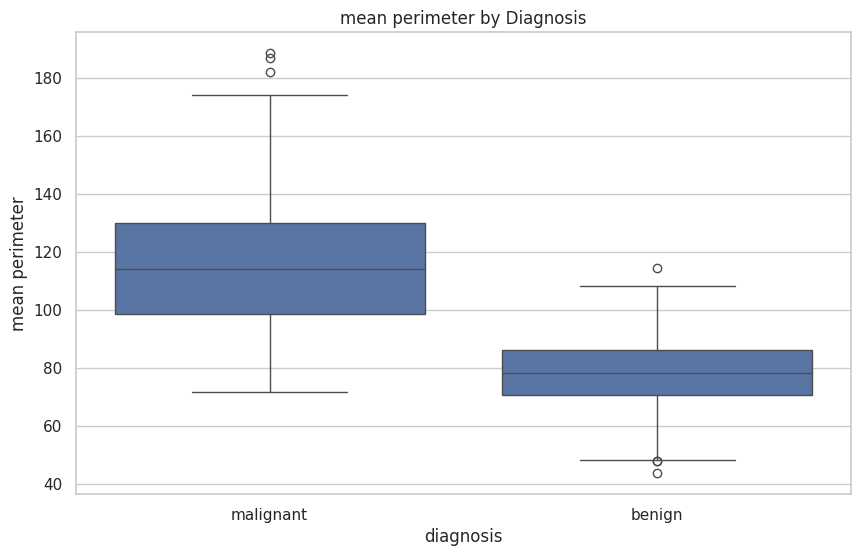

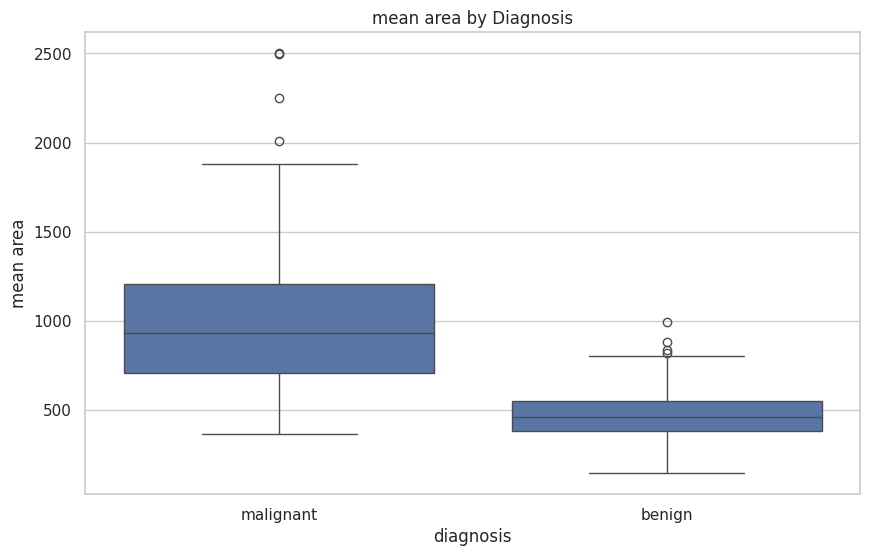

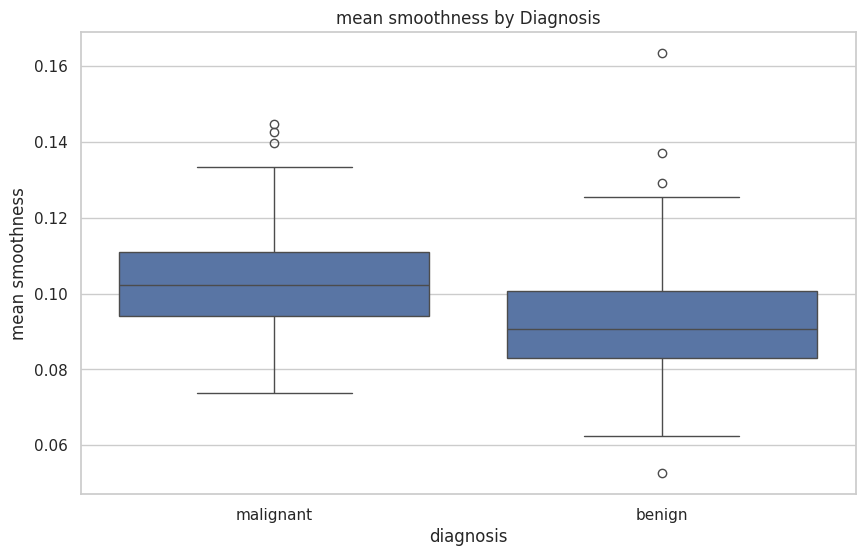

In [5]:
# Visualize some features by diagnosis using boxplots
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
for feature in features_to_plot:
    plt.figure()
    sns.boxplot(x='diagnosis', y=feature, data=summary)
    plt.title(f'{feature} by Diagnosis')
    plt.show()

In [ ]:
# Hypothesis testing for numeric features between malignant and benign
print("\nT-test results for numeric features:")
for col in X.columns:
    malignant_vals = X.loc[y==0, col]
    benign_vals = X.loc[y==1, col]
    stat, pval = ttest_ind(malignant_vals, benign_vals, equal_var=False)
    print(f"{col}: t-stat = {stat:.3f}, p-value = {pval:.4e}")


T-test results for numeric features:
mean radius: t-stat = 22.209, p-value = 1.6845e-64
mean texture: t-stat = 11.022, p-value = 3.0191e-25
mean perimeter: t-stat = 22.935, p-value = 1.0231e-66
mean area: t-stat = 19.641, p-value = 3.2844e-52
mean smoothness: t-stat = 9.297, p-value = 5.5733e-19
mean compactness: t-stat = 15.818, p-value = 9.6079e-42
mean concavity: t-stat = 20.332, p-value = 3.7421e-58
mean concave points: t-stat = 24.845, p-value = 3.1273e-71
mean symmetry: t-stat = 8.112, p-value = 5.9577e-15
mean fractal dimension: t-stat = -0.297, p-value = 7.6672e-01
radius error: t-stat = 13.301, p-value = 1.4911e-30
texture error: t-stat = -0.208, p-value = 8.3542e-01
perimeter error: t-stat = 12.833, p-value = 6.8686e-29
area error: t-stat = 12.156, p-value = 2.9836e-26
smoothness error: t-stat = -1.623, p-value = 1.0530e-01
compactness error: t-stat = 7.083, p-value = 6.3418e-12
concavity error: t-stat = 6.916, p-value = 1.2665e-11
concave points error: t-stat = 10.735, p-va

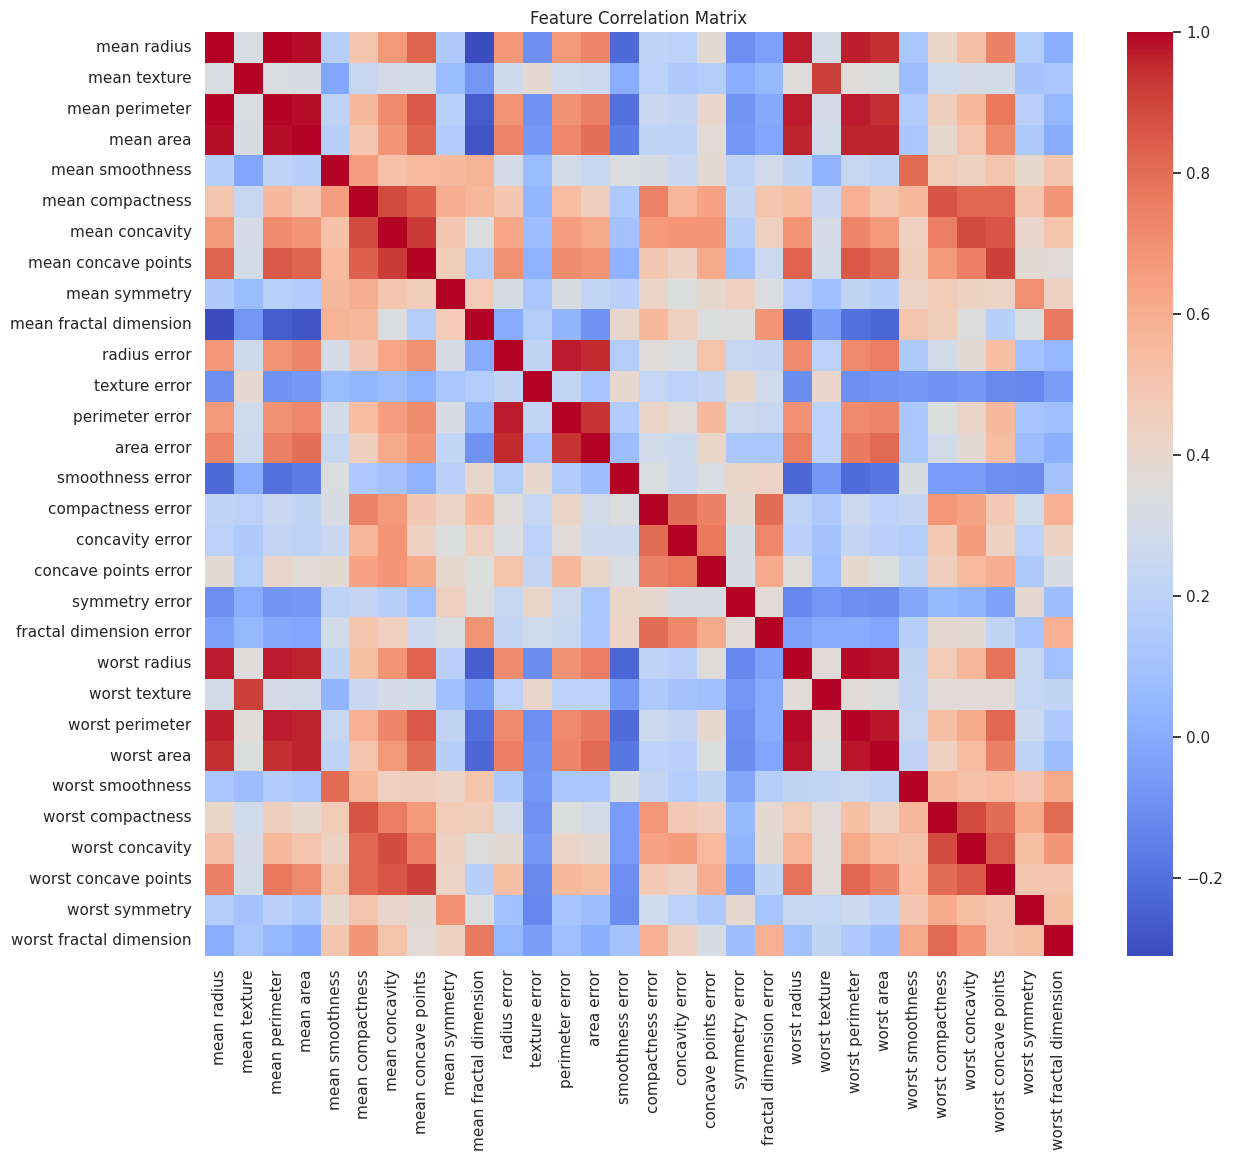

In [7]:

# Correlation heatmap for features
plt.figure(figsize=(14,12))
corr = X.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

In [8]:
# Feature scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [10]:
# Train Random Forest Classifier (baseline)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [11]:
# Predict and evaluate
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



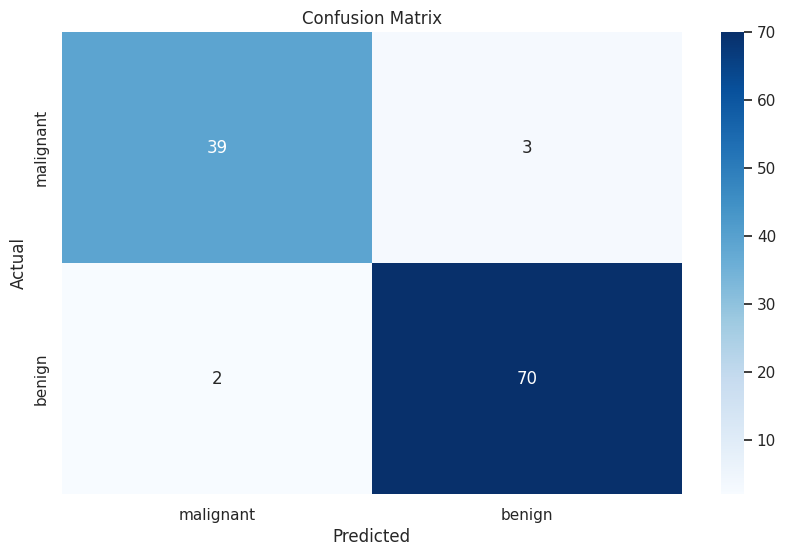

In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['malignant','benign']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['malignant','benign'], yticklabels=['malignant','benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

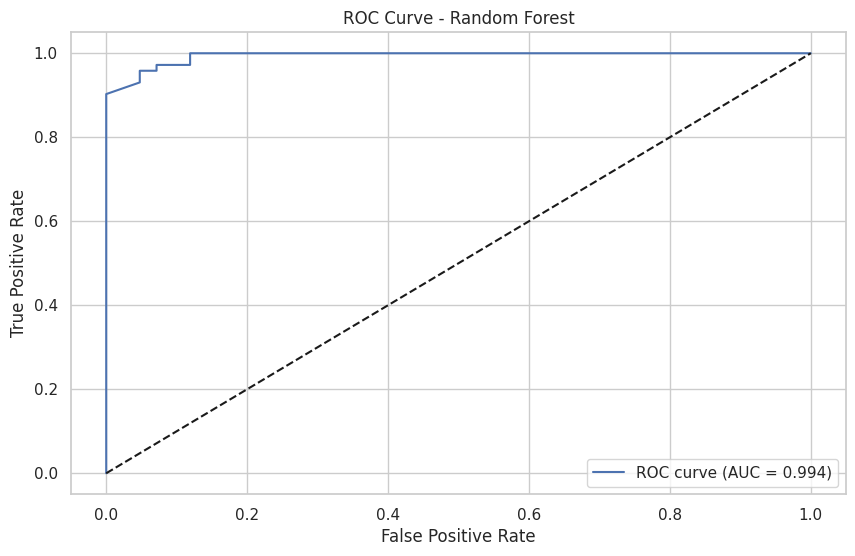

In [13]:
# ROC Curve and AUC
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

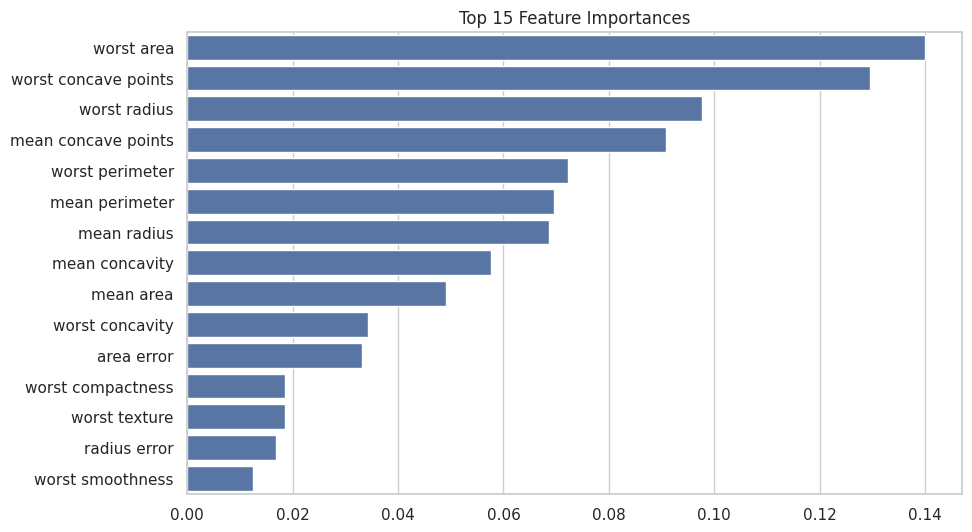

In [14]:
# Feature importance plot
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:15], y=np.array(X.columns)[indices][:15])
plt.title('Top 15 Feature Importances')
plt.show()

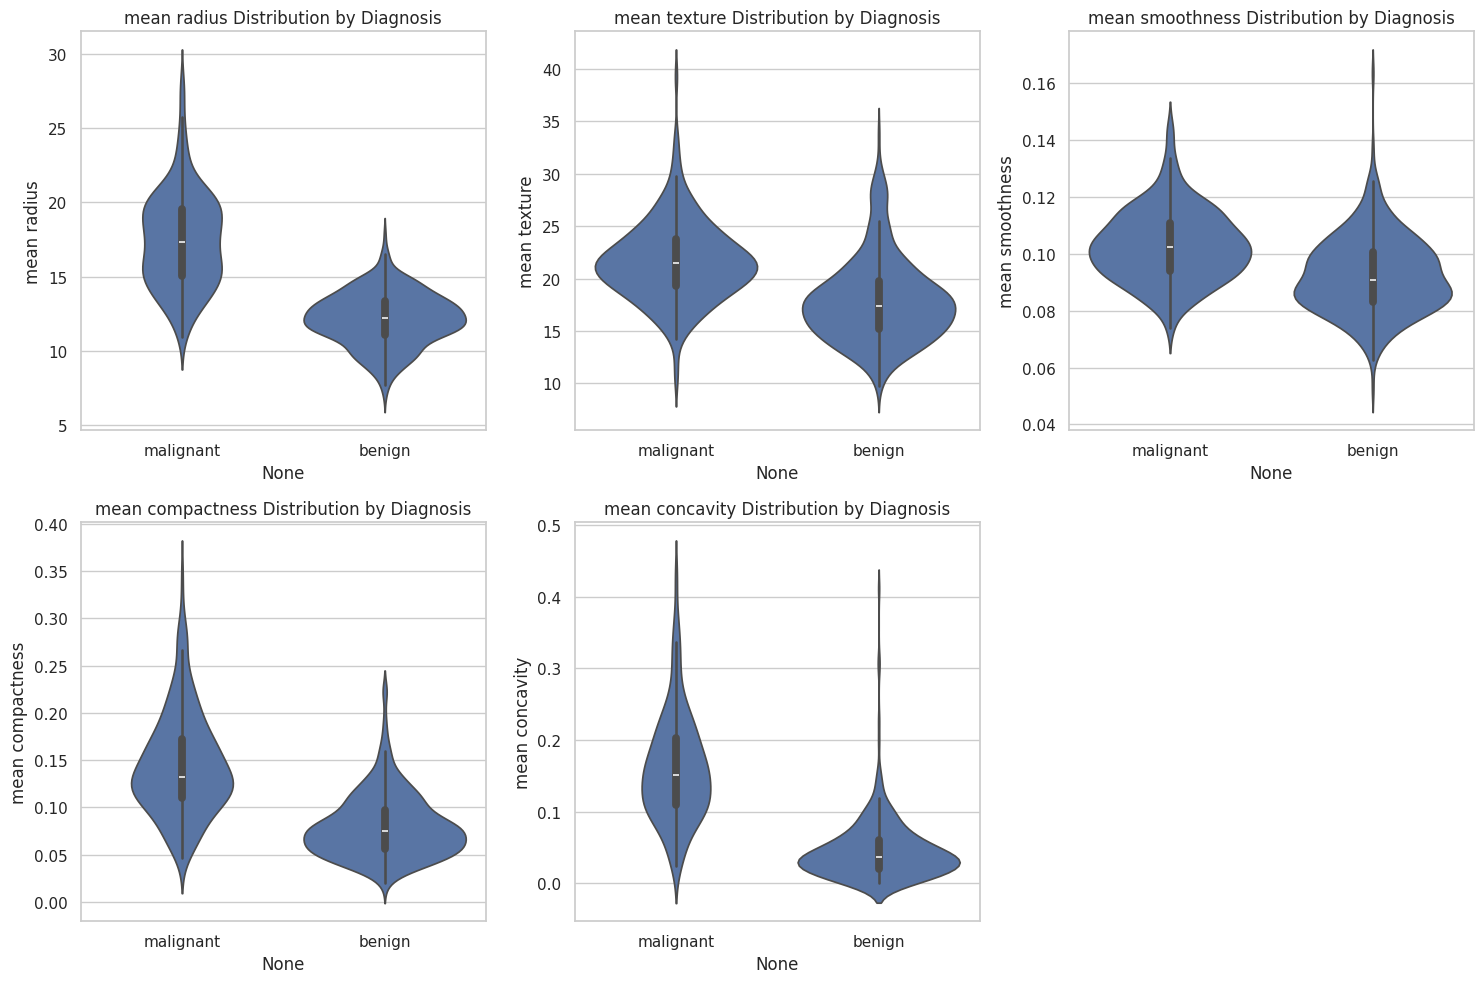

In [ ]:
# Distribution of numeric features by diagnosis
features_to_plot = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity']

plt.figure(figsize=(15,10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=y_labels, y=X[feature])
    plt.title(f'{feature} Distribution by Diagnosis')
plt.tight_layout()
plt.show()


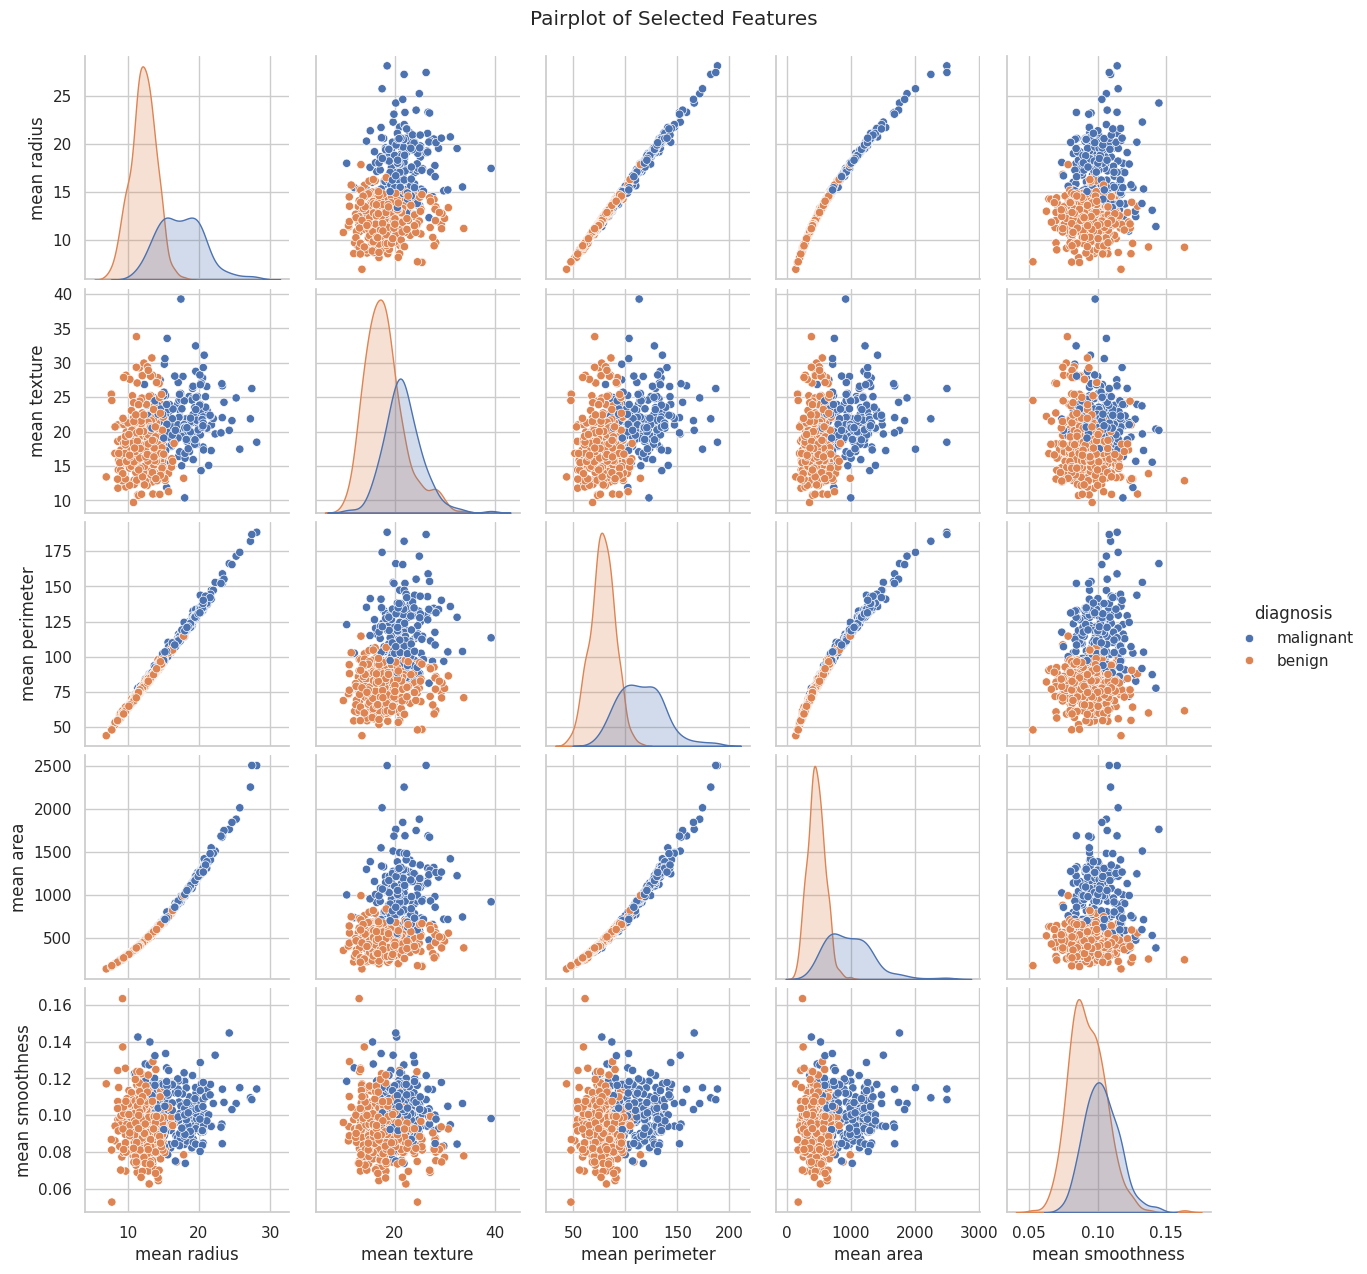

In [ ]:
# Pairplot
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
sns.pairplot(pd.concat([X[key_features], y_labels.rename('diagnosis')], axis=1), hue='diagnosis', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

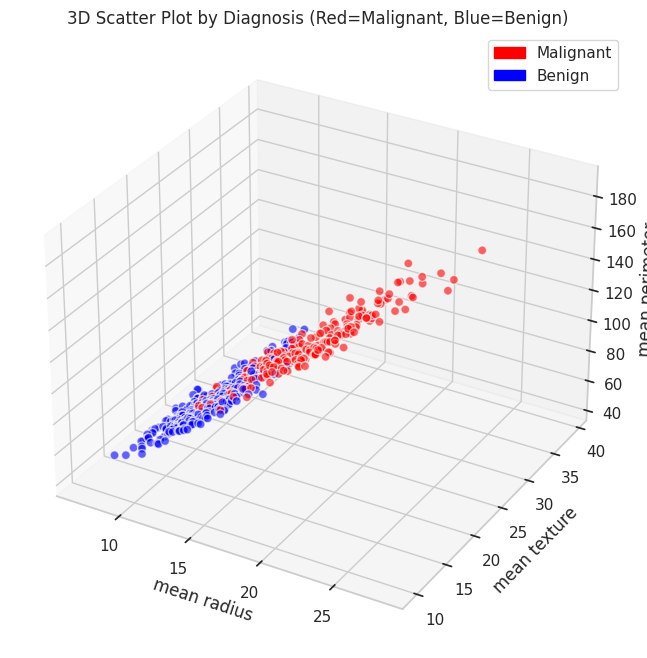

In [17]:
# 3D scatter plot for three important features colored by diagnosis
feat1 = 'mean radius'
feat2 = 'mean texture'
feat3 = 'mean perimeter'

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')


colors = y.map({0: 'red', 1: 'blue'})

scatter = ax.scatter(
    X[feat1], X[feat2], X[feat3],
    c=colors, alpha=0.6, s=40, edgecolors='w'
)

ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_zlabel(feat3)
ax.set_title('3D Scatter Plot by Diagnosis (Red=Malignant, Blue=Benign)')

red_patch = mpatches.Patch(color='red', label='Malignant')
blue_patch = mpatches.Patch(color='blue', label='Benign')
plt.legend(handles=[red_patch, blue_patch])

plt.show()



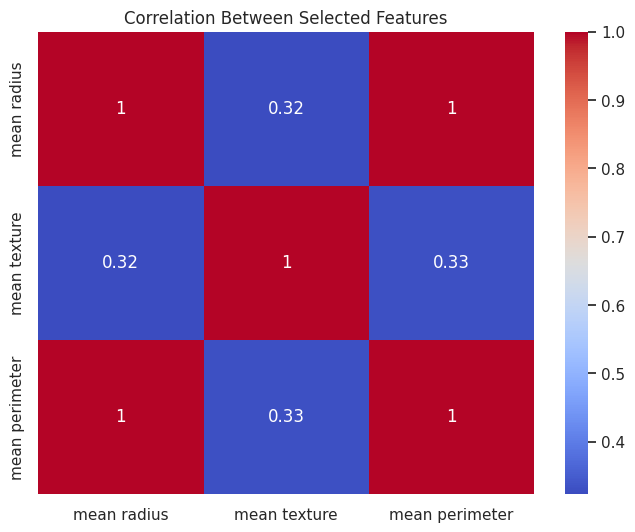

In [ ]:
# Correlation heatmap focused on the features 
plt.figure(figsize=(8,6))
sns.heatmap(X[[feat1, feat2, feat3]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Selected Features')
plt.show()

In [ ]:

# L2 Regularization 
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42, max_iter=1000)
lr_l2.fit(X_train, y_train)
y_pred_l2 = lr_l2.predict(X_test)
print("L2 Regularization Logistic Regression Performance:")
print(classification_report(y_test, y_pred_l2))



L2 Regularization Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# L1 Regularization 
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
lr_l1.fit(X_train, y_train)
y_pred_l1 = lr_l1.predict(X_test)
print("L1 Regularization Logistic Regression Performance:")
print(classification_report(y_test, y_pred_l1))



L1 Regularization Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [ ]:
# Inspect coefficients 

print("\nNumber of non-zero coefficients in L1 model:", np.sum(lr_l1.coef_ != 0))
print("Number of non-zero coefficients in L2 model:", np.sum(lr_l2.coef_ != 0))



Number of non-zero coefficients in L1 model: 16
Number of non-zero coefficients in L2 model: 30


In [22]:


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Best C:", grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Best C: {'C': 1}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [23]:
# Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Logistic Regression with L2 Regularization
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



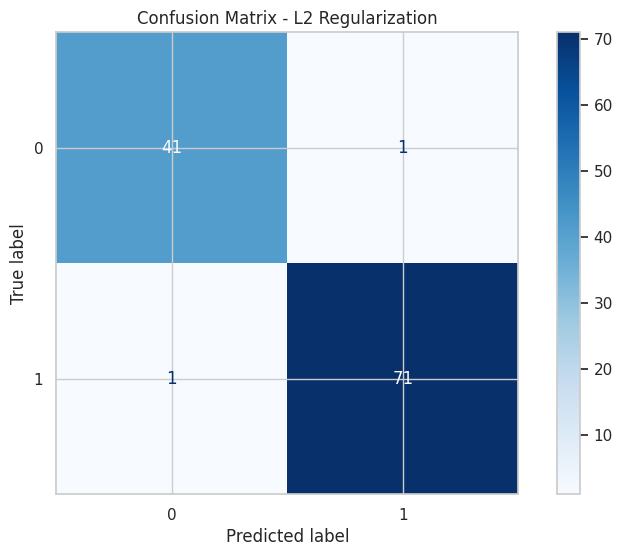

In [24]:
# Logistic Regression with L2 regularization 
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
lr_l2.fit(X_train_scaled, y_train)
y_pred_l2 = lr_l2.predict(X_test_scaled)

print("Logistic Regression with L2 Regularization")
print(classification_report(y_test, y_pred_l2))


ConfusionMatrixDisplay.from_estimator(lr_l2, X_test_scaled, y_test, cmap='Blues')
plt.title('Confusion Matrix - L2 Regularization')
plt.show()



Logistic Regression with L1 Regularization 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



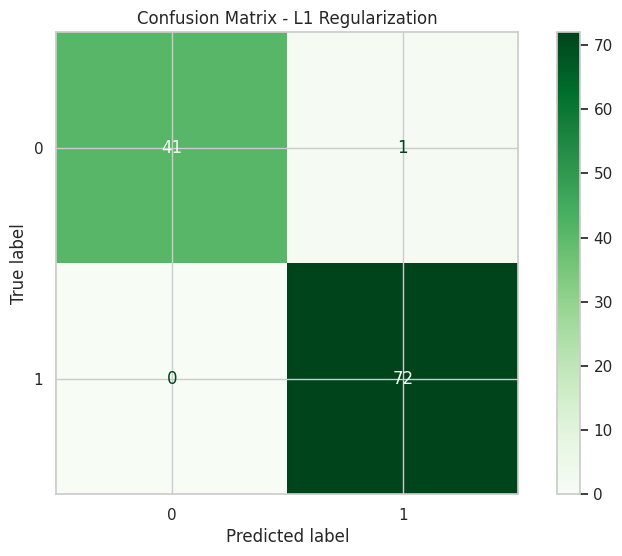

In [25]:
# Logistic Regression with L1 regularization 
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lr_l1.fit(X_train_scaled, y_train)
y_pred_l1 = lr_l1.predict(X_test_scaled)

print("Logistic Regression with L1 Regularization ")
print(classification_report(y_test, y_pred_l1))

ConfusionMatrixDisplay.from_estimator(lr_l1, X_test_scaled, y_test, cmap='Greens')
plt.title('Confusion Matrix - L1 Regularization')
plt.show()




In [26]:
# Inspect number of non-zero coefficients 
print("Number of non-zero coefficients in L1 model:", np.sum(lr_l1.coef_ != 0))
print("Number of non-zero coefficients in L2 model:", np.sum(lr_l2.coef_ != 0))



Number of non-zero coefficients in L1 model: 16
Number of non-zero coefficients in L2 model: 30


Best C from GridSearchCV: {'C': 1}
 Best Logistic Regression (L1) after Hyperparameter Tuning
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



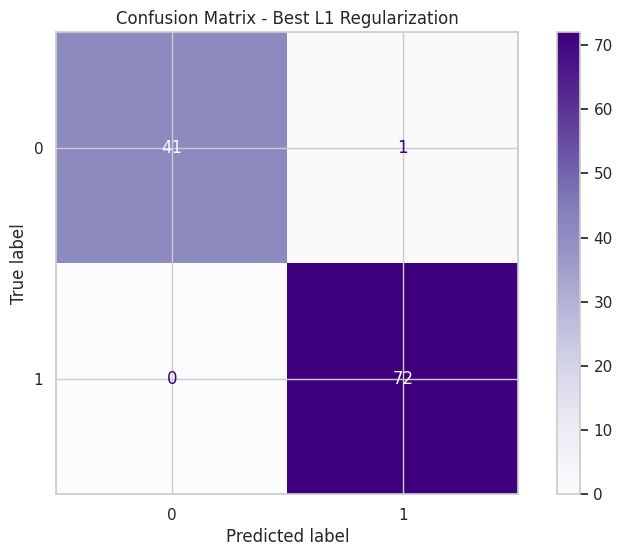

In [27]:
# Hyperparameter tuning for L1 model 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42),
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print(f"Best C from GridSearchCV: {grid_search.best_params_}")

best_l1_model = grid_search.best_estimator_
y_pred_best = best_l1_model.predict(X_test_scaled)
print(" Best Logistic Regression (L1) after Hyperparameter Tuning")
print(classification_report(y_test, y_pred_best))

ConfusionMatrixDisplay.from_estimator(best_l1_model, X_test_scaled, y_test, cmap='Purples')
plt.title('Confusion Matrix - Best L1 Regularization')
plt.show()



In [28]:
# Feature importance of best L1 model
coef = best_l1_model.coef_.flatten()
features = X.columns
important_features = features[coef != 0]
coefficients = coef[coef != 0]

feature_importance_df = pd.DataFrame({'feature': important_features, 'coefficient': coefficients})
feature_importance_df = feature_importance_df.sort_values(by='coefficient', ascending=False)

print("Important features selected by L1 regularization:")
print(feature_importance_df)



Important features selected by L1 regularization:
                    feature  coefficient
6         compactness error     0.698341
8   fractal dimension error     0.190994
2    mean fractal dimension     0.080631
4             texture error     0.024568
7      concave points error    -0.072610
5          smoothness error    -0.198856
0              mean texture    -0.397179
1       mean concave points    -0.489200
12         worst smoothness    -0.609725
15           worst symmetry    -0.663777
13          worst concavity    -0.677940
10            worst texture    -1.205456
9              worst radius    -1.248721
14     worst concave points    -1.705453
3              radius error    -2.167842
11               worst area    -3.529897


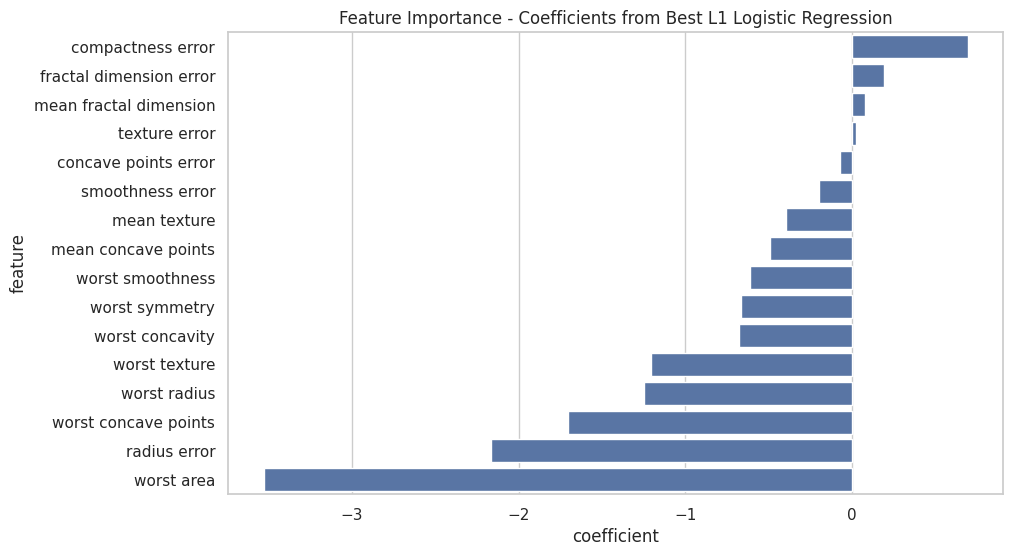

In [29]:
# bar plot of feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='coefficient', y='feature', data=feature_importance_df)
plt.title('Feature Importance - Coefficients from Best L1 Logistic Regression')
plt.show()